Weakly coupled Co-simulation
================

This guides shows how to implement a simplified weakly-coupled co-simulation in emtsim

Test circuit
--------------------

As a first simple, test we will simulate a small static network. The network consists of 4 nodes and 4 elements:

| Component | Type              | Python Class                              | Node A | Node B | Paramter |
| :---------| :----             | :---------------------------------------- | :----- | :----- | :------- |
| r_1       | Source resistance | `dpsimpy.emt.ph1.Resistor`                 | 0      | GND    | 0.1 Ohm  |
| c_1       | Line capacitance  | `dpsimpy.emt.ph1.Capacitor`                | 0      | GND    | 1 Farad  |
| c_2       | Line capacitance  | `dpsimpy.emt.ph1.Capacitor`                | 1      | GND    | 1 Farad  |
| r_line    | Line resistance   | `dpsimpy.emt.ph1.Resistor`                 | 1      | 0      | 0.1 Ohm  |
| r_load    | Load              | `dpsimpy.emt.ph1.Resistor`                 | 1      | GND    | 1 Ohm    |

Before we can start, we must import the DPsim Python module.
We also add `emt` as an alias for the dynamic phasor components.

In [1]:
import dpsimpy

Next, we can define the model by creating a couple of components.
Each component is identified by a name which is passed as the first argument.
Following arguments are used to define the topology by assigning the component to a specific node / bus or to pass parameters.

In [2]:
# Nodes
gnd = dpsimpy.emt.SimNode.gnd
n1  = dpsimpy.emt.SimNode("n1")
n2  = dpsimpy.emt.SimNode("n2")

r_1 = dpsimpy.emt.ph1.Resistor("r_1")
r_1.R = 0.1
r_line = dpsimpy.emt.ph1.Resistor("r_line")
r_line.R = 0.1
c_1 = dpsimpy.emt.ph1.Capacitor("c_1")
c_1.C = 1
c_2 = dpsimpy.emt.ph1.Capacitor("c_2")
c_2.C = 1
r_load = dpsimpy.emt.ph1.Resistor("r_load")
r_load.R = 1

# Initial conditions
n1.set_initial_voltage(5)
n2.set_initial_voltage(2)

# Connections 
r_1.connect([n1, gnd])
r_line.connect([n1, n2])
c_1.connect([n1, gnd])
c_2.connect([n2, gnd])
r_load.connect([n2, gnd])

Next, we have to create a simulation object:

In [3]:
sys = dpsimpy.SystemTopology(50, [ gnd, n1, n2 ], [ r_1, r_line, c_1, c_2, r_load ])

We can also visualize the system topology:

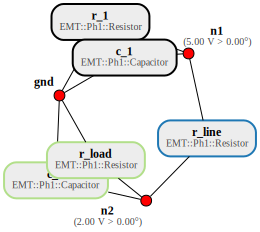

In [4]:
sys

Finally, we can start the simulation and wait for its completion:

In [5]:
sim = dpsimpy.Simulation("EMTCosim", loglevel=dpsimpy.LogLevel.debug)
sim.set_domain(dpsimpy.Domain.EMT)
sim.set_system(sys)
sim.set_time_step(0.01)
sim.set_final_time(1.0)

log = dpsimpy.Logger("EMTCosim")
for i in range(1, len(sys.nodes)):
    log.log_attribute("v" + str(i), "v", sys.nodes[i])

sim.add_logger(log)
    
sim.run()

[09:55:34.084247 EMTCosim info] Initialize simulation: EMTCosim
[09:55:34.084457 MnaSolverFactory info] creating KLUAdapter solver implementation
[09:55:34.085258 EMTCosim info] Scheduling tasks.
[09:55:34.085642 EMTCosim info] Scheduling done.
[09:55:34.085645 EMTCosim info] Opening interfaces.
[09:55:34.085647 EMTCosim info] Start synchronization with remotes on interfaces
[09:55:34.085650 EMTCosim info] Synchronized simulation start with remotes
[09:55:34.085653 EMTCosim info] Start simulation: EMTCosim
[09:55:34.085659 EMTCosim info] Time step: 1.000000e-02
[09:55:34.085663 EMTCosim info] Final time: 1.000000e+00
[09:55:34.086935 EMTCosim info] Simulation calculation time: 0.001261
[09:55:34.087048 EMTCosim info] Simulation finished.


Next, we run the co-simulation

In [6]:
import subprocess

subprocess.run(["python3", "../Python/Attributes/emt-cosim-attributes.py"])
process = subprocess.Popen(["python3", "../villas/emt-cosim-villas.py"], stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

[09:55:34.281079 EMTCosimAttributes2 info] Initialize simulation: EMTCosimAttributes2
[09:55:34.281387 MnaSolverFactory info] creating KLUAdapter solver implementation
[09:55:34.282505 EMTCosimAttributes2 info] Scheduling tasks.
[09:55:34.283001 EMTCosimAttributes2 info] Scheduling done.
[09:55:34.283011 EMTCosimAttributes2 info] Opening interfaces.
[09:55:34.283013 EMTCosimAttributes2 info] Start synchronization with remotes on interfaces
[09:55:34.283016 EMTCosimAttributes2 info] Synchronized simulation start with remotes
[09:55:34.283019 EMTCosimAttributes2 info] Start simulation: EMTCosimAttributes2
[09:55:34.283027 EMTCosimAttributes2 info] Time step: 1.000000e-02
[09:55:34.283031 EMTCosimAttributes2 info] Final time: 1.000000e+00
[09:55:34.285915 EMTCosimAttributes1 info] Initialize simulation: EMTCosimAttributes1
[09:55:34.286177 MnaSolverFactory info] creating KLUAdapter solver implementation
[09:55:34.287332 EMTCosimAttributes1 info] Scheduling tasks.
[09:55:34.287846 EMTCosim

Output value from S2: 2.000000
Output value from S1: 30.000000
Input value in S2 before set: 0.000000
Input value in S2 after set: 30.000000+0.000000j
Output value from S2: 2.139303
Output value from S1: 25.033921
Time t=0.010000
Input value in S2 before set: 30.000000
Input value in S2 after set: 25.033921+0.000000j
Output value from S2: 2.391817
Output value from S1: 16.127117
Time t=0.020000
Input value in S2 before set: 25.033921
Input value in S2 after set: 16.127117+0.000000j
Output value from S2: 2.572800
Output value from S1: 9.292978
Time t=0.030000
Input value in S2 before set: 16.127117
Input value in S2 after set: 9.292978+0.000000j
Output value from S2: 2.673668
Output value from S1: 4.301605
Time t=0.040000
Input value in S2 before set: 9.292978
Input value in S2 after set: 4.301605+0.000000j
Output value from S2: 2.714699
Output value from S1: 0.697227
Time t=0.050000
Input value in S2 before set: 4.301605
Input value in S2 after set: 0.697227+0.000000j
Output value from

[09:55:34.343457 EMTCosimAttributes2 info] Simulation calculation time: 0.060391
[09:55:34.343757 EMTCosimAttributes2 info] Simulation finished.
[09:55:34.343937 EMTCosimAttributes1 info] Simulation calculation time: 0.056048
[09:55:34.344116 EMTCosimAttributes1 info] Simulation finished.


Results can be analyzed and plotted by the `villas.dataprocessing` package:

column number: 2
results length: 100
real column names: ['v1', 'v2']
complex column names: []
column number: 4
results length: 100
real column names: ['i', 'ir', 'v1', 'v2']
complex column names: []


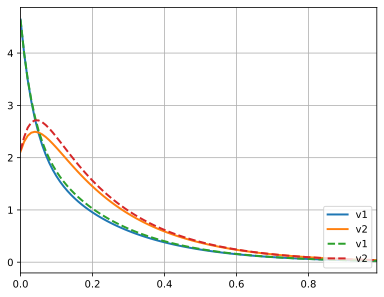

In [7]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
%config InlineBackend.rc = {'font.size': 10, 'figure.figsize': (6.0, 4.0), 'figure.facecolor': 'white', 'savefig.dpi': 72, 'figure.subplot.bottom': 0.125, 'figure.edgecolor': 'white'}

import matplotlib.pyplot as plt
import villas.dataprocessing.plottools as pt
import villas.dataprocessing.readtools as rt
import villas.dataprocessing.timeseries as ts

results = rt.read_timeseries_dpsim('logs/EMTCosim.csv')

results_emt = []
for series in results:
    results_emt.append(results[series])

results_attributes0 = rt.read_timeseries_dpsim('logs/EMTCosimAttributes1/EMTCosimAttributes1.csv')
# results_villas0 = rt.read_timeseries_dpsim('logs/EMTCosimVILLAS1/EMTCosimVILLAS1.csv')

results_emt_attributes_0 = []
for series in results_attributes0:
    results_emt_attributes_0.append(results_attributes0[series])
    
# results_emt_villas_0 = []
# for series in results_villas0:
#     results_emt_villas_0.append(results_villas0[series])

for series in results_emt:
    pt.plot_timeseries('Results EMT', series)

# for series in results_emt_attributes_0:
#     pt.plot_timeseries('Results EMT', series, '--')

pt.plot_timeseries('Results EMT', results_emt_attributes_0[2], '--')
pt.plot_timeseries('Results EMT', results_emt_attributes_0[3], '--')
    
# for series in results_emt_villas_0:
#     pt.plot_timeseries('Results EMT', series, '--')

plt.grid()
plt.show()

In [8]:
!cat logs/Example1_Solver.log

cat: logs/Example1_Solver.log: No such file or directory
